In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor

In [2]:
#loading dataset
url='/home/umar/ML-AI/datasets/forestfires.csv'
dataset=pd.read_csv(url,header=0)
print("Shape of dataset is:",dataset.shape)

Shape of dataset is: (517, 13)


In [3]:
#OneHotEncoding the month and days columns
#encoding and concating to original dataframe
dataset=pd.concat([dataset,pd.get_dummies(dataset['month'], prefix='month')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['day'], prefix='day')],axis=1)
dataset.drop(['month','day'],axis=1,inplace=True)# dropping original month and day columns
dataset.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


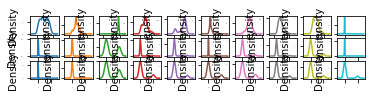

In [4]:
#Unimodal data visualisation
# density distribution graph
dataset.plot(kind='density',subplots=True,layout=(10,10),sharex=False,legend=False,fontsize=1)
pyplot.show()

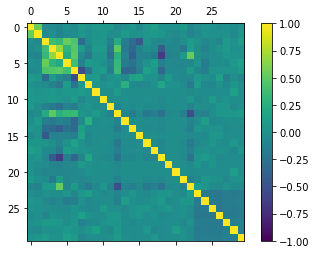

In [5]:
#multimodal data visualisation
#corelation matrix 
fig=pyplot.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(dataset.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [6]:
# find the index no. of area column 
index_no = dataset.columns.get_loc("area") 
print(index_no)

10


In [7]:
#splitting dataset into testing and training
array=dataset.values
X=array[:,0:10 and 11:] #all the rows, all the columns except 10th colomn for features
Y=array[:,10] # all the rows, only the 10th column of target
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,test_size=0.20,random_state=7)

In [8]:
#spot-check
models=[]
models.append(('LR',LinearRegression()))
models.append(('RIDGE',Ridge(alpha=1.0)))
models.append(('LASSO',Lasso()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('EN',ElasticNet()))
models.append(('BR',BayesianRidge()))

In [9]:
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10)
    #cv_results=cv_scores(model, X_train, Y_train, cv=kfold, scoring='r2')
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg="%s %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR 1.000000 (0.000000)
RIDGE 1.000000 (0.000000)
LASSO 1.000000 (0.000000)
CART 0.955823 (0.066775)
EN 1.000000 (0.000000)
BR 1.000000 (0.000000)


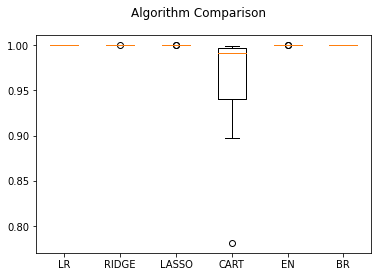

In [10]:
#algorithm comparison
# box and whisker plot
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()